# Customer Analysis Round 4

1. Get the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
df.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.rename(columns={"EmploymentStatus": "Employment_Status"}, inplace = True)

In [6]:
df.isnull().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
Employment_Status                0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [7]:
df.shape

(9134, 24)

In [8]:
df.dtypes

Customer                          object
State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
Employment_Status                 object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

2. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

In [9]:
numerical = df.select_dtypes(np.number)

In [10]:
numerical.head(2)

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935


In [11]:
categorical = df.select_dtypes(np.object)

In [12]:
categorical.head(2)

,Customer,State,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


3. Now we will try to check the normality of the numerical variables visually

    3a. Use seaborn library to construct distribution plots for the numerical variables

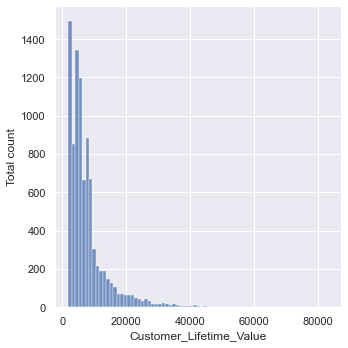

In [72]:
sns.displot(data = df, x = df['Customer_Lifetime_Value'], bins = 75);
plt.ylabel('Total count');

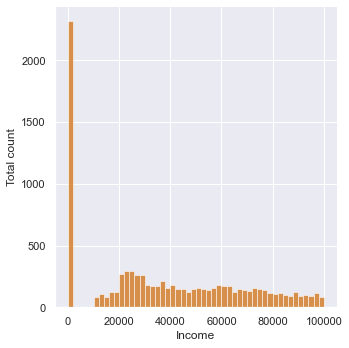

In [70]:
sns.displot(data = df, x = df['Income'], color = '#d17213', bins = 50);
plt.ylabel('Total count');

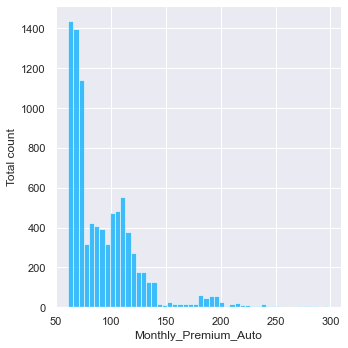

In [68]:
sns.displot(data = df, x = df['Monthly_Premium_Auto'], color = '#03adfc', bins = 50);
plt.ylabel('Total count');

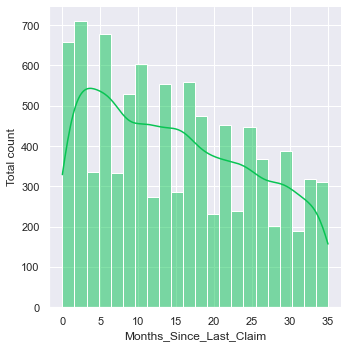

In [67]:
sns.displot(data = df, x = df['Months_Since_Last_Claim'], color = '#08c453', kde = True);
plt.ylabel('Total count');

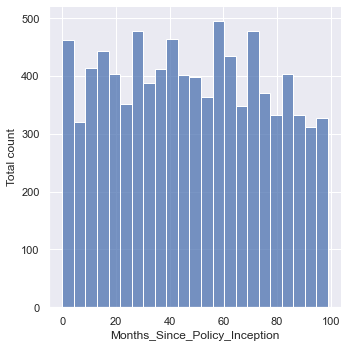

In [66]:
sns.displot(data = df, x = df['Months_Since_Policy_Inception']);
plt.ylabel('Total count');

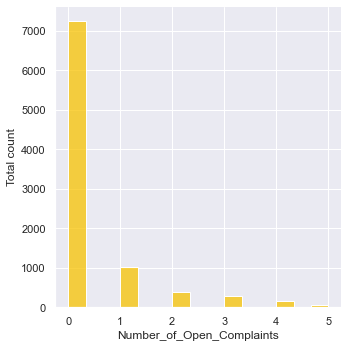

In [61]:
sns.displot(data = df, x = df['Number_of_Open_Complaints'], shrink = 1, color = '#f7c202');
plt.ylabel('Total count');

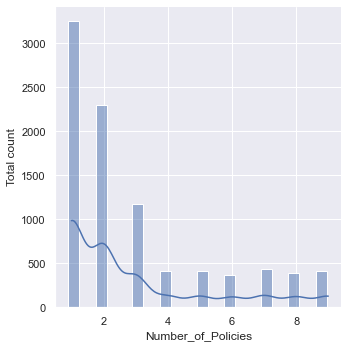

In [59]:
sns.displot(data = df, x = df['Number_of_Policies'], kde = True, shrink = 1.2);
plt.ylabel('Total count');

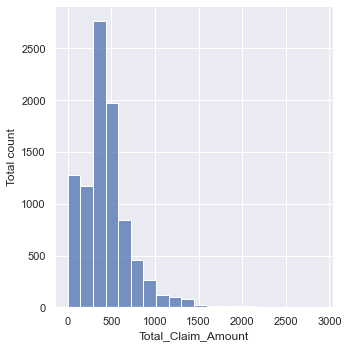

In [60]:
sns.displot(data = df, x = df['Total_Claim_Amount'], bins = 20);
plt.ylabel('Total count');

    3b. Use Matplotlib to construct histograms

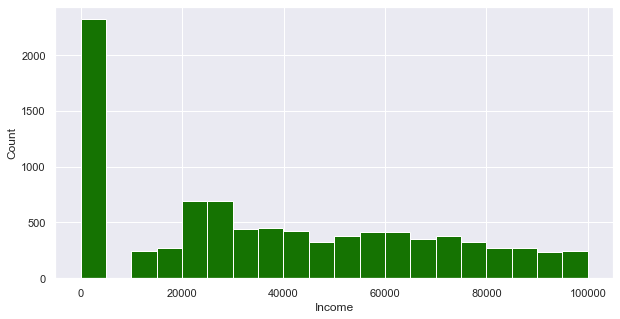

In [94]:
plt.figure(figsize = (10, 5))
plt.hist(df['Income'], color = '#157302', bins = 20)
plt.xlabel('Income')
plt.ylabel('Count')
plt.show() 

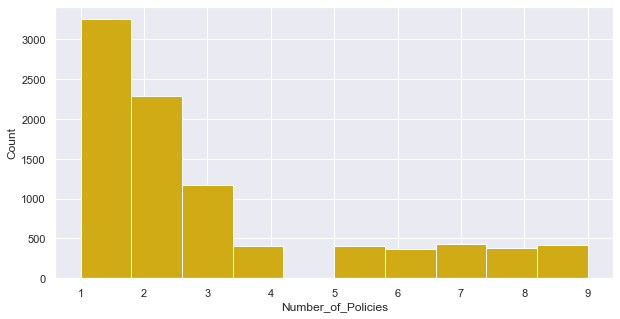

In [96]:
plt.figure(figsize = (10, 5))
plt.hist(df['Number_of_Policies'], color = '#d1ab15', bins = 10)
plt.xlabel('Number_of_Policies')
plt.ylabel('Count')
plt.show() 

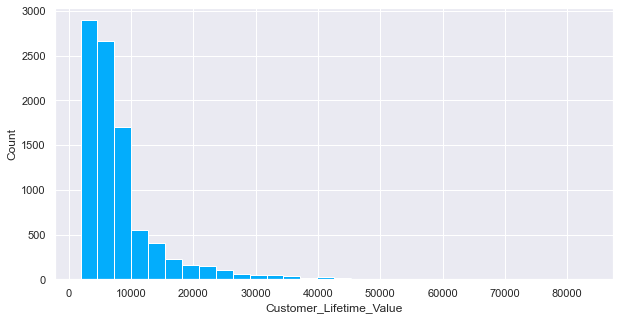

In [99]:
plt.figure(figsize = (10, 5))
plt.hist(df['Customer_Lifetime_Value'], color = '#03adfc', bins = 30)
plt.xlabel('Customer_Lifetime_Value')
plt.ylabel('Count')
plt.show() 

    3c. Do the distributions for different numerical variables look like a normal distribution

4. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [104]:
numerical.corr('pearson')

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly_Premium_Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months_Since_Last_Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months_Since_Policy_Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number_of_Open_Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number_of_Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total_Claim_Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [105]:
numerical.corr('kendall')

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.038081,0.350830,0.003478,-0.001684,-0.024689,0.302811,0.144097
Income,0.038081,1.000000,-0.012074,-0.017980,-0.001340,0.005154,-0.007655,-0.279763
Monthly_Premium_Auto,0.350830,-0.012074,1.000000,-0.004021,0.009874,-0.010140,-0.005149,0.398305
Months_Since_Last_Claim,0.003478,-0.017980,-0.004021,1.000000,-0.032842,0.004631,0.008421,-0.000567
Months_Since_Policy_Inception,-0.001684,-0.001340,0.009874,-0.032842,1.000000,-0.010538,-0.007026,-0.004512
Number_of_Open_Complaints,-0.024689,0.005154,-0.010140,0.004631,-0.010538,1.000000,0.001319,-0.019562
Number_of_Policies,0.302811,-0.007655,-0.005149,0.008421,-0.007026,0.001319,1.000000,-0.008250
Total_Claim_Amount,0.144097,-0.279763,0.398305,-0.000567,-0.004512,-0.019562,-0.008250,1.000000


In [106]:
numerical.corr('spearman')

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
Income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
Monthly_Premium_Auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
Months_Since_Last_Claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
Months_Since_Policy_Inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
Number_of_Open_Complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
Number_of_Policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
Total_Claim_Amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


5. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

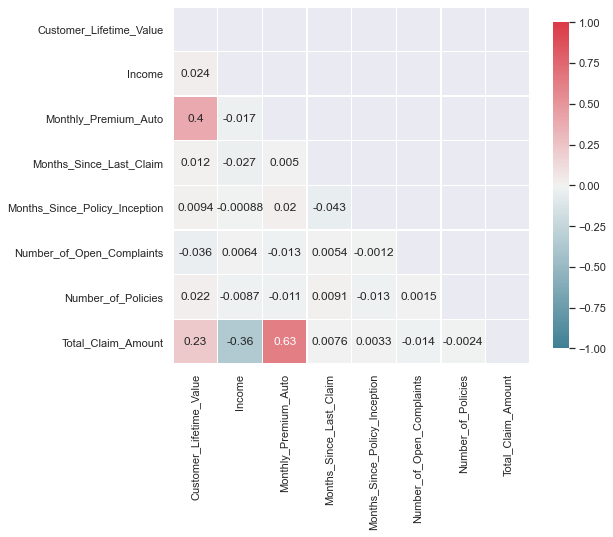

In [108]:
corr = numerical.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(2020, 10, as_cmap = True)
plt.figure(figsize = (8, 8))
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, annot = True,
            square = True, linewidths = 0.5, cbar_kws = {'shrink' : 0.75});